# Regressão

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gym Exercise

In [3]:
path = "/content/drive/MyDrive/Aulas - DS/dados/"

In [4]:
df_gym = pd.read_csv(path + "gym_members_exercise_tracking.csv")

In [5]:
df_gym.shape

(973, 15)

In [6]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

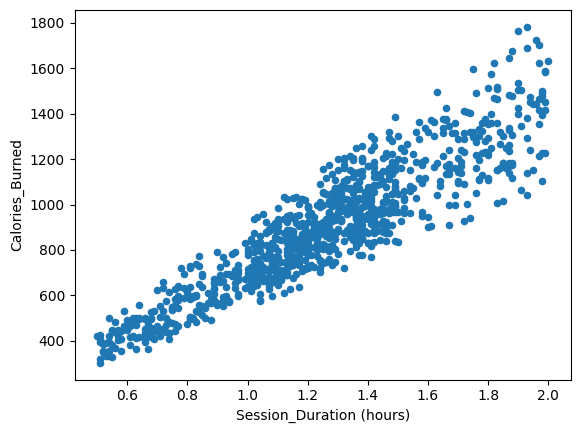

In [7]:
df_gym.plot(x="Session_Duration (hours)", y="Calories_Burned", kind="scatter")

## Separando Atributos e Target

In [8]:
X = df_gym[["Session_Duration (hours)"]]
y = df_gym[["Calories_Burned"]]

## Criando uma Regressão Linear Simples

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
pred = model.predict(X)

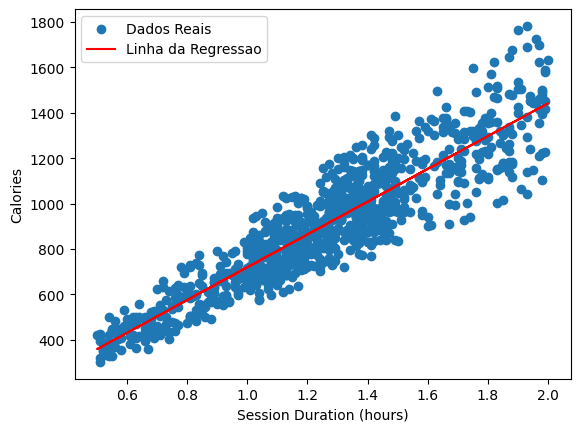

In [12]:
plt.scatter(x=X["Session_Duration (hours)"], y=y, label="Dados Reais")
plt.plot(X["Session_Duration (hours)"], pred, label="Linha da Regressao", color="red")

plt.ylabel("Calories")
plt.xlabel("Session Duration (hours)")
plt.legend()
plt.show()

In [13]:
residuals = y - pred

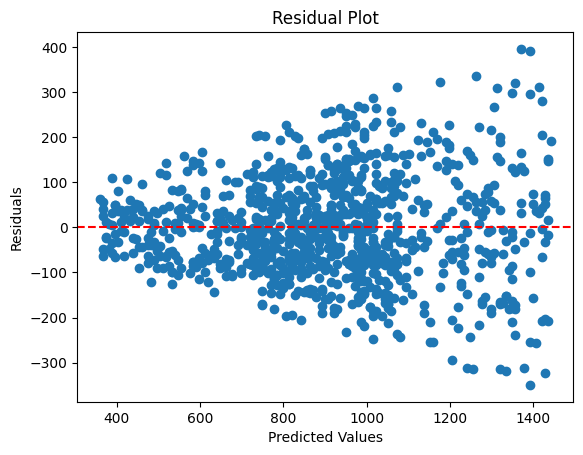

In [14]:
plt.scatter(pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Pred x Target')

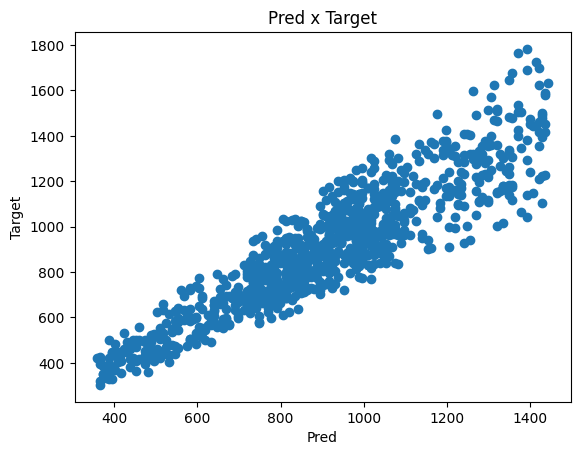

In [15]:
plt.scatter(pred, y)
plt.xlabel("Pred")
plt.ylabel("Target")
plt.title("Pred x Target")

### Separando os dados em Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_gym.drop("Calories_Burned", axis=1)
y = df_gym["Calories_Burned"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
X_train.shape

(778, 14)

In [20]:
X_test.shape

(195, 14)

In [21]:
X_train.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
967,20,Male,55.0,1.60,172,168,67,1.12,Yoga,24.0,3.2,4,2,21.48
365,39,Female,60.6,1.65,162,167,63,0.92,HIIT,27.6,1.7,3,1,22.26
559,54,Female,75.6,1.72,194,154,60,0.97,Cardio,26.4,1.9,3,1,25.55
33,24,Female,58.9,1.51,187,157,68,1.04,Cardio,31.7,2.5,2,1,25.83
31,20,Female,65.4,1.52,185,127,50,1.03,Yoga,28.0,2.2,4,2,28.31


### Tratando atributos categóricos

In [22]:
X_train["Workout_Type"].value_counts()

,count
Workout_Type,
Strength,211
Cardio,209
Yoga,179
HIIT,179


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoder.fit(X_train[["Workout_Type", "Gender"]])

X_train_categorical_columns = encoder.transform(X_train[["Workout_Type", "Gender"]])
X_test_categorical_columns = encoder.transform(X_test[["Workout_Type", "Gender"]])

In [25]:
X_train = pd.concat([X_train.drop(["Workout_Type", "Gender"], axis=1), X_train_categorical_columns], axis=1)

In [26]:
X_test = pd.concat([X_test.drop(["Workout_Type", "Gender"], axis=1), X_test_categorical_columns], axis=1)

### Trinando e realizando Predict

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
model = LinearRegression()
model.fit(X_train[["Session_Duration (hours)"]], y_train)

y_pred = model.predict(X_test[["Session_Duration (hours)"]])
mae = mean_absolute_error(y_test, y_pred)
mae

95.03480033445553

### Avaliando as predições

In [29]:
residuals = y_test - y_pred

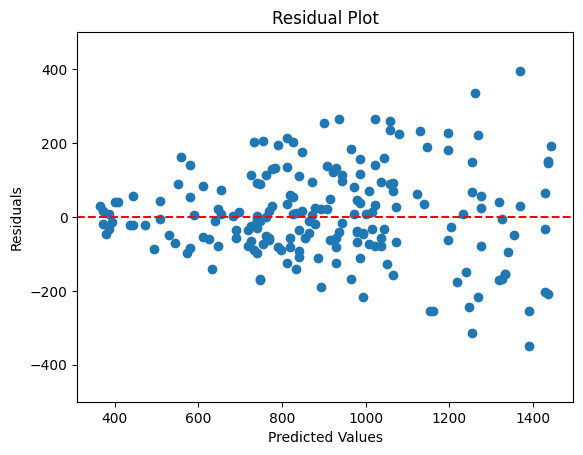

In [30]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.ylim((-500, 500))
plt.show()

## Regressão Linear Múltipla

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

30.270139845320795

In [32]:
residuals = y_test - y_pred

In [33]:
residuals.abs().mean()

30.270139845320795

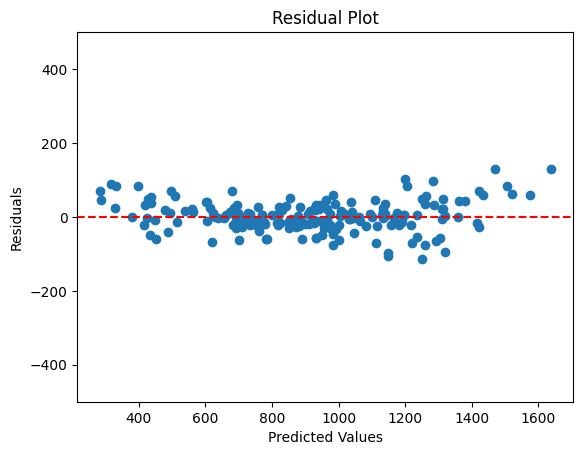

In [34]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.ylim((-500, 500))
plt.show()

### Interpretando os Coeficientes da Regressão Linear

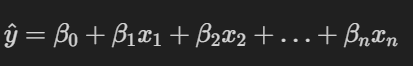

In [35]:
model.intercept_

-983.6778704343276

In [36]:
model.coef_

array([-3.31556080e+00, -1.00598336e+00,  1.08168013e+02,  1.08805915e-01,
        6.15788095e+00,  6.03315684e-01,  7.12813300e+02, -6.43730698e-01,
       -3.53909166e+00,  3.95769050e+00, -3.67455298e+00,  3.36018705e+00,
        3.95997991e+00, -2.67674260e-01,  6.95260162e-01, -4.38756581e+00,
       -4.12986606e+01,  4.12986606e+01])

In [37]:
len(model.coef_)

18

In [38]:
x = X_test.iloc[0].values

In [39]:
sum(model.coef_ * x) + model.intercept_

913.2929019751894

In [40]:
y_pred[0]

913.2929019751891

In [41]:
df_coef = pd.DataFrame({
    "Features": X_train.columns,
    "Coeficientes": model.coef_
})
df_coef

,Features,Coeficientes
0,Age,-3.315561
1,Weight (kg),-1.005983
2,Height (m),108.168013
3,Max_BPM,0.108806
4,Avg_BPM,6.157881
5,Resting_BPM,0.603316
6,Session_Duration (hours),712.813300
7,Fat_Percentage,-0.643731
8,Water_Intake (liters),-3.539092
9,Workout_Frequency (days/week),3.957690


In [42]:
df_coef["Coeficientes_Absoluto"] = df_coef["Coeficientes"].abs()

<Axes: ylabel='Features'>

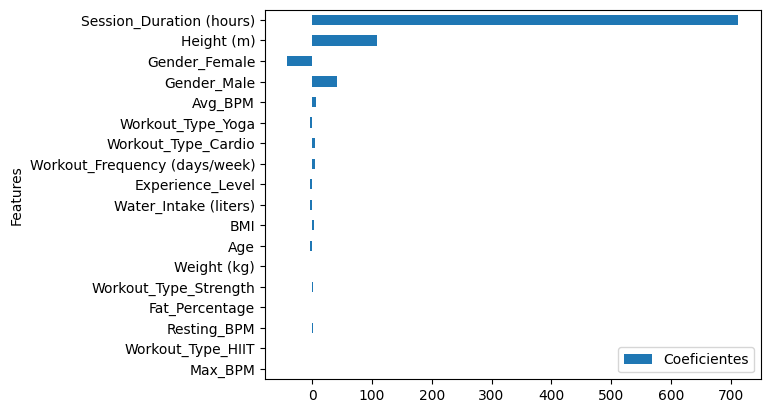

In [43]:
df_coef.sort_values("Coeficientes_Absoluto", ascending=True).plot(kind="barh", x="Features", y="Coeficientes")

<Axes: ylabel='Frequency'>

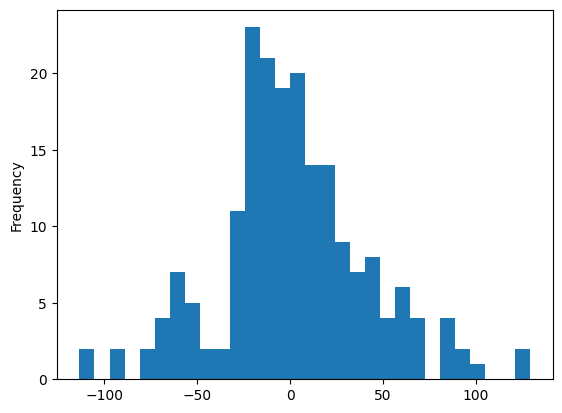

In [44]:
residuals.plot(kind="hist", bins=30)

### Analisando os dados

In [45]:
df_corr = X_train.corr()

In [46]:
df_corr

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender_Female,Gender_Male
Age,1.000000,-0.067671,-0.016373,-0.021903,0.080135,-0.008126,-0.011484,0.008664,0.034919,0.030417,-0.008071,-0.053464,-0.040301,0.003777,0.019944,0.017598,-0.006300,0.006300
Weight (kg),-0.067671,1.000000,0.372351,0.049328,-0.011073,-0.013469,-0.011101,-0.234515,0.408174,0.005948,0.015118,0.849798,0.026978,0.039012,-0.046924,-0.017857,-0.573180,0.573180
Height (m),-0.016373,0.372351,1.000000,-0.057417,-0.017122,-0.000547,-0.009226,-0.238102,0.391995,0.001349,0.004269,-0.157753,-0.019376,-0.013922,-0.025376,0.061132,-0.586690,0.586690
Max_BPM,-0.021903,0.049328,-0.057417,1.000000,-0.042396,0.027311,0.030093,-0.013544,0.030548,-0.021016,0.000106,0.083389,0.008156,0.012005,-0.041880,0.023644,0.011065,-0.011065
Avg_BPM,0.080135,-0.011073,-0.017122,-0.042396,1.000000,0.070027,0.028216,-0.020048,-0.003184,-0.001472,0.009077,-0.002203,0.000443,-0.005342,0.009270,-0.004917,-0.000266,0.000266
Resting_BPM,-0.008126,-0.013469,-0.000547,0.027311,0.070027,1.000000,0.023454,-0.031448,0.053768,0.020149,0.031435,-0.013961,-0.050151,0.057657,0.031273,-0.037874,-0.021415,0.021415
Session_Duration (hours),-0.011484,-0.011101,-0.009226,0.030093,0.028216,0.023454,1.000000,-0.578470,0.254766,0.639245,0.763745,-0.003247,-0.051015,0.048021,0.014462,-0.009571,0.028182,-0.028182
Fat_Percentage,0.008664,-0.234515,-0.238102,-0.013544,-0.020048,-0.031448,-0.578470,1.000000,-0.586133,-0.536769,-0.652545,-0.125843,0.043005,-0.061803,0.052382,-0.038819,0.406813,-0.406813
Water_Intake (liters),0.034919,0.408174,0.391995,0.030548,-0.003184,0.053768,0.254766,-0.586133,1.000000,0.233791,0.289955,0.229339,-0.003511,0.058777,-0.042847,-0.009819,-0.673774,0.673774
Workout_Frequency (days/week),0.030417,0.005948,0.001349,-0.021016,-0.001472,0.020149,0.639245,-0.536769,0.233791,1.000000,0.831661,0.013200,-0.059923,0.014981,0.037810,0.008187,0.002357,-0.002357


In [47]:
import seaborn as sns

<Axes: >

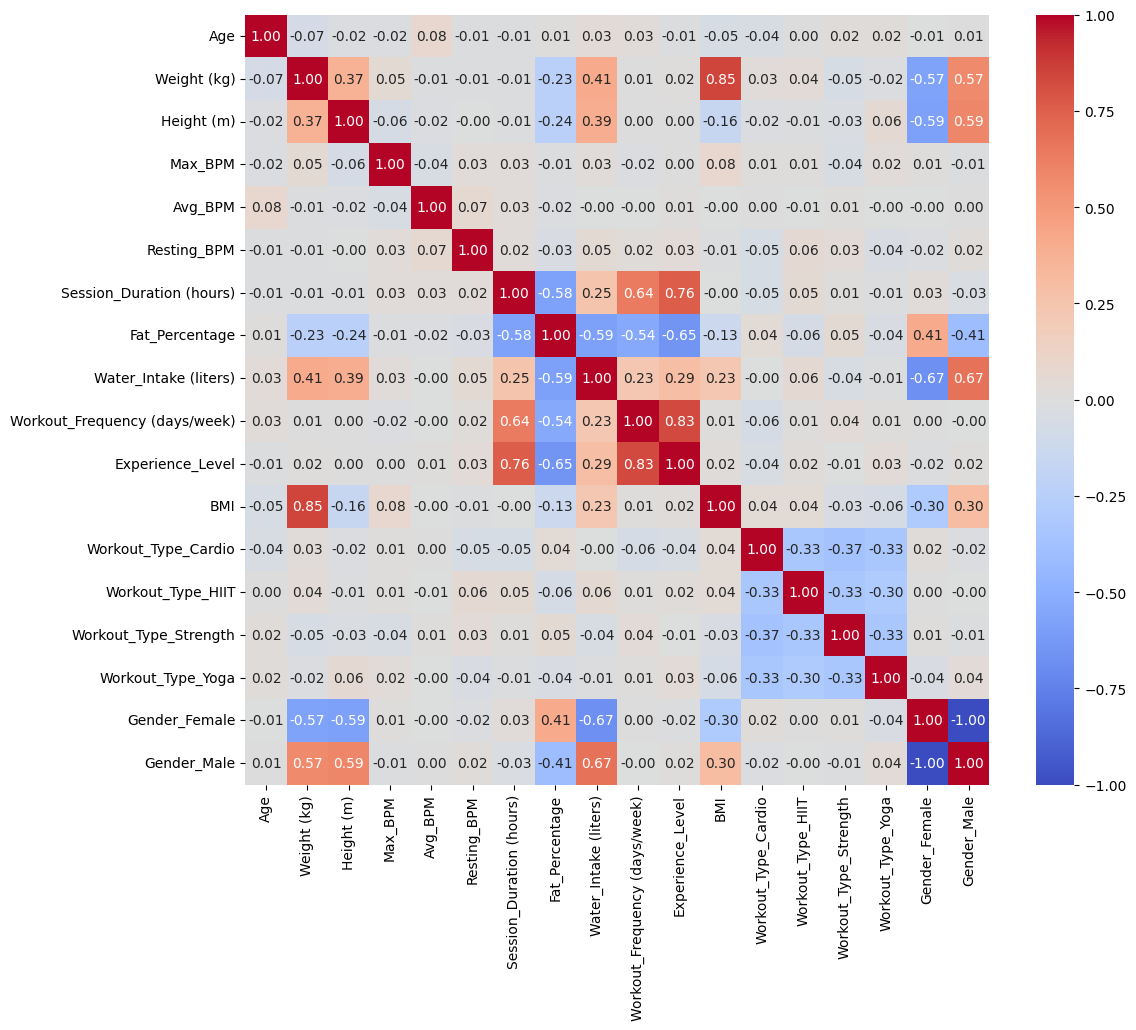

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm")

## Métricas de Avaliação

### Mean Absolute Error (MAE)

In [49]:
residuals.abs().mean()

30.270139845320795

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mean_absolute_error(y_test, y_pred)

30.270139845320795

### Mean Squared Error (MSE) e Root Mean Squared Error (RMSE)

In [52]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [54]:
print("MSE", mse)
print("RMSE", rmse)

MSE 1646.1760145970534
RMSE 40.57309471308608


In [55]:
np.sqrt(mse)

40.57309471308608

In [56]:
(residuals ** 2).mean()

1646.1760145970534

### Mean Absolute Percentage Error (MAPE)

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

In [58]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE", mape)

MAPE 0.036852992171519446


In [59]:
mape * 100

3.6852992171519445

### R2 (R-Squared)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

R2 0.9802675995368526


# Airplane Price Dataset

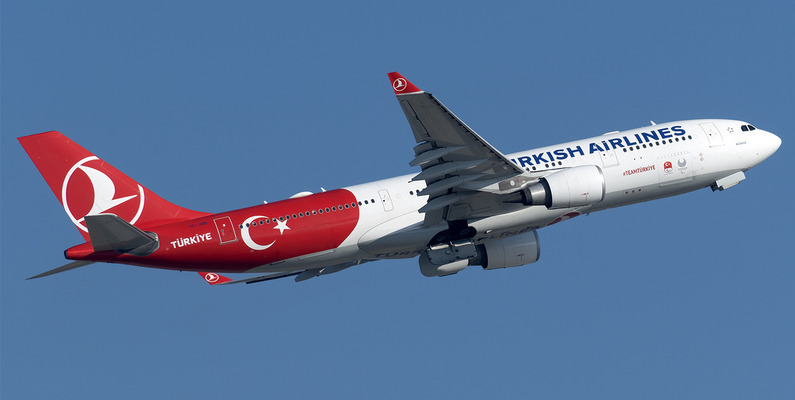

In [62]:
df_airplane = pd.read_csv(path + "airplane_price_dataset.csv")

In [63]:
column_names = [
    'Modelo',
    'Ano de produção',
    'Número de motores',
    'Tipo de motor',
    'Capacidade',
    'Autonomia (km)',
    'Consumo de combustível (L/hora)',
    'Custo de manutenção por hora ($)',
    'Idade',
    'Região de Vendas',
    'Preço ($)'
]

In [64]:
# Renomenado as colunas
df_airplane.columns = column_names

In [65]:
df_airplane.shape

(12377, 11)

In [66]:
df_airplane.head()

,Modelo,Ano de produção,Número de motores,Tipo de motor,Capacidade,Autonomia (km),Consumo de combustível (L/hora),Custo de manutenção por hora ($),Idade,Região de Vendas,Preço ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [67]:
target = "Preço ($)"

## Analisando o Target

In [68]:
df_airplane[target].describe()

,Preço ($)
count,1.237700e+04
mean,1.988336e+08
std,2.290392e+08
min,1.458148e+05
25%,1.409681e+07
50%,8.392191e+07
75%,3.843239e+08
max,9.782132e+08


<Axes: ylabel='Frequency'>

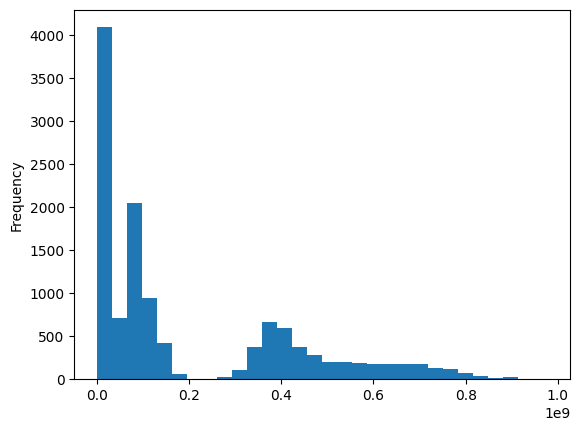

In [69]:
df_airplane[target].plot(kind="hist", bins=30)

In [70]:
# Transformando a unidade do target (de doláres para milhões de doláres)
df_airplane[target] = df_airplane[target] / 1000000

## Separação de Dados

In [71]:
X = df_airplane.drop(target, axis=1)
y = df_airplane[target]

In [72]:
X.select_dtypes("object").describe()

,Modelo,Tipo de motor,Região de Vendas
count,12377,12377,12377
unique,6,2,6
top,Boeing 737,Turbofan,Afrika
freq,2121,10338,2171


## Preparação dos dados

In [73]:
categorical_features = ["Modelo", "Tipo de motor",	"Região de Vendas"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoder.fit(X_train[categorical_features])

X_train_categorical_columns = encoder.transform(X_train[categorical_features])
X_test_categorical_columns = encoder.transform(X_test[categorical_features])

X_train = pd.concat([X_train.drop(categorical_features, axis=1), X_train_categorical_columns], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), X_test_categorical_columns], axis=1)

In [77]:
X_train.head()

,Ano de produção,Número de motores,Capacidade,Autonomia (km),Consumo de combustível (L/hora),Custo de manutenção por hora ($),Idade,Modelo_Airbus A320,Modelo_Airbus A350,Modelo_Boeing 737,...,Modelo_Bombardier CRJ200,Modelo_Cessna 172,Tipo de motor_Piston,Tipo de motor_Turbofan,Região de Vendas_Afrika,Região de Vendas_Asya,Região de Vendas_Avrupa,Região de Vendas_Avustralya,Região de Vendas_Güney Amerika,Região de Vendas_Kuzey Amerika
123,1988,2,350,14800,9.45,4777.73,35,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7033,1986,2,162,5700,3.43,516.27,37,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1952,2017,2,396,15600,13.86,4709.85,6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10599,1982,2,180,6300,3.42,2721.65,41,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6131,1989,2,50,3000,6.16,1974.45,34,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Modelagem
Testando diferentes Regressores

### Árvore de Decisão

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [80]:
# Funcao para aplicar várias métricas de avaliação

def regression_report(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  return pd.Series({
      "MAE": mae,
      "MSE": mse,
      "RMSE": rmse,
      "MAPE": mape * 100,
      "R2": r2
  })

In [81]:
# Função para gerar plot dos resíduos

def plot_residuals(y_true, y_pred):
  residuals = y_test - y_pred

  plt.scatter(y_true, residuals)
  plt.axhline(y=0, color="red", linestyle="--")

  plt.xlabel("Predictions")
  plt.ylabel("Residuals")
  plt.show()

In [82]:
regression_report(y_test, y_pred)

,0
MAE,23.093169
MSE,1970.238594
RMSE,44.387370
MAPE,11.671136
R2,0.963141


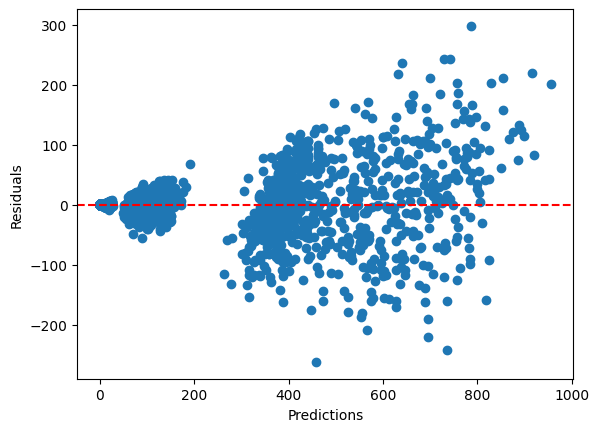

In [83]:
plot_residuals(y_test, y_pred)

### k-NN

In [84]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,22.964970
MSE,2070.493795
RMSE,45.502679
MAPE,11.195597
R2,0.961265


### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,17.219442
MSE,1089.297122
RMSE,33.004502
MAPE,8.755128
R2,0.979622


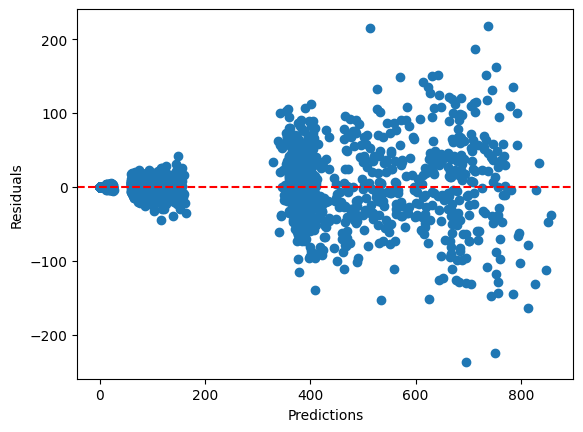

In [86]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")

plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

### Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,16.743990
MSE,974.303388
RMSE,31.213833
MAPE,71.892506
R2,0.981773


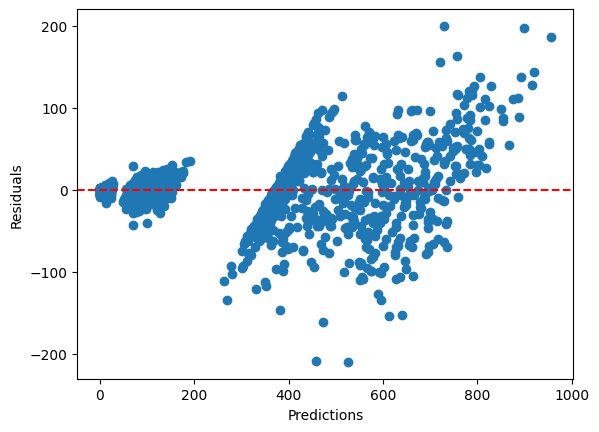

In [88]:
plot_residuals(y_test, y_pred)

### Rede Neural (MLP)

In [89]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,37.054651
MSE,2789.381699
RMSE,52.814597
MAPE,889.465032
R2,0.947817


In [90]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,22.808328
MSE,1521.506368
RMSE,39.006491
MAPE,161.455541
R2,0.971536


### Comparando os Modelos

In [91]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "k-NN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "MLP (Neural Network)": MLPRegressor(random_state=42)
}

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
results = {}

for model_name, model in models.items():
  print(model_name)
  cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
  results[model_name] = {
      "Mean MAE": np.mean(-cv_results),
      "Std MAE": np.std(-cv_results)
  }

df_results = pd.DataFrame(results)

Linear Regression
Decision Tree
k-NN
Random Forest
Gradient Boosting
MLP (Neural Network)


In [94]:
df_results.T

,Mean MAE,Std MAE
Linear Regression,48.329511,0.839269
Decision Tree,23.417588,1.108291
k-NN,22.980543,0.992769
Random Forest,17.368041,0.595204
Gradient Boosting,16.429401,0.577899
MLP (Neural Network),30.761131,6.379189


<Axes: >

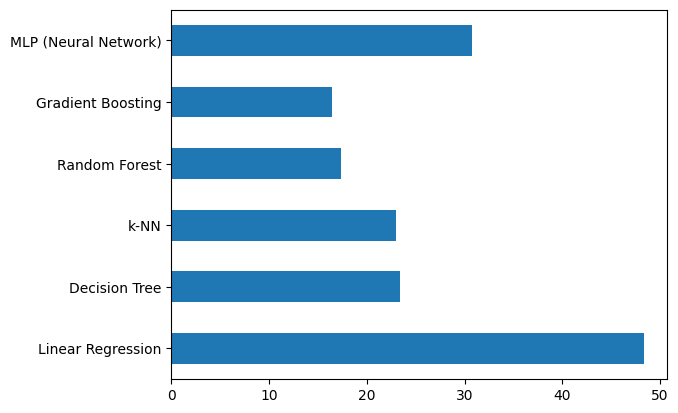

In [95]:
df_results.T["Mean MAE"].plot(kind="barh")

In [96]:
from sklearn.model_selection import KFold

In [97]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Modelo,Ano de produção,Número de motores,Tipo de motor,Capacidade,Autonomia (km),Consumo de combustível (L/hora),Custo de manutenção por hora ($),Idade,Região de Vendas
123,Airbus A350,1988,2,Turbofan,350,14800,9.45,4777.73,35,Avustralya
7033,Boeing 737,1986,2,Turbofan,162,5700,3.43,516.27,37,Güney Amerika
1952,Boeing 777,2017,2,Turbofan,396,15600,13.86,4709.85,6,Avustralya
10599,Airbus A320,1982,2,Turbofan,180,6300,3.42,2721.65,41,Avrupa
6131,Bombardier CRJ200,1989,2,Turbofan,50,3000,6.16,1974.45,34,Avrupa


In [99]:
for train_index, test_index in kfold.split(X_train):
  X_train_fold = X_train.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]

  print("TRAIN:", train_index)
  print("TEST:", test_index)
  print("##############")

  # ...
  # pré-processamento, treinamento e avaliacao...

TRAIN: [   1    2    4 ... 9896 9898 9900]
TEST: [   0    3    8 ... 9894 9897 9899]
##############
TRAIN: [   0    1    2 ... 9897 9898 9899]
TEST: [  26   27   41 ... 9857 9863 9900]
##############
TRAIN: [   0    1    3 ... 9898 9899 9900]
TEST: [   2   15   28 ... 9881 9886 9896]
##############
TRAIN: [   0    1    2 ... 9898 9899 9900]
TEST: [   6    7   16 ... 9892 9893 9895]
##############
TRAIN: [   0    2    3 ... 9897 9899 9900]
TEST: [   1    4    5 ... 9888 9889 9898]
##############


## Impacto do Pré-processamento

### Normalização

In [100]:
# Como a maioria dos modelos nao suportam dados categóricos,
# vamos aplicar o mesmo tratamento feito anteriormente, o One Hot Encoder.
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoder.fit(X_train[categorical_features])

X_train_categorical_columns = encoder.transform(X_train[categorical_features])
X_test_categorical_columns = encoder.transform(X_test[categorical_features])

X_train = pd.concat([X_train.drop(categorical_features, axis=1), X_train_categorical_columns], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), X_test_categorical_columns], axis=1)

In [101]:
# k-NN com dados originais, sem normalizacao

model = KNeighborsRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
regression_report(y_test, y_pred)

,0
MAE,22.964970
MSE,2070.493795
RMSE,45.502679
MAPE,11.195597
R2,0.961265


In [102]:
# Visualizaçao dos dados com diferentes escalas
X_train.head()

,Ano de produção,Número de motores,Capacidade,Autonomia (km),Consumo de combustível (L/hora),Custo de manutenção por hora ($),Idade,Modelo_Airbus A320,Modelo_Airbus A350,Modelo_Boeing 737,...,Modelo_Bombardier CRJ200,Modelo_Cessna 172,Tipo de motor_Piston,Tipo de motor_Turbofan,Região de Vendas_Afrika,Região de Vendas_Asya,Região de Vendas_Avrupa,Região de Vendas_Avustralya,Região de Vendas_Güney Amerika,Região de Vendas_Kuzey Amerika
123,1988,2,350,14800,9.45,4777.73,35,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7033,1986,2,162,5700,3.43,516.27,37,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1952,2017,2,396,15600,13.86,4709.85,6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10599,1982,2,180,6300,3.42,2721.65,41,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6131,1989,2,50,3000,6.16,1974.45,34,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [103]:
# Transformacao das variáveis numéricas com MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [104]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_train.columns)

In [105]:
# Treinando e avaliando um k-NN com dados normalizados
model = KNeighborsRegressor()
model.fit(X_train_normalized, y_train)

y_pred = model.predict(X_test_normalized)

regression_report(y_test, y_pred)

,0
MAE,18.008369
MSE,1180.904998
RMSE,34.364298
MAPE,9.168854
R2,0.977908


In [106]:
# Treinando e avaliando um MLP com dados normalizados

model = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42)
model.fit(X_train_normalized, y_train)

y_pred = model.predict(X_test_normalized)

regression_report(y_test, y_pred)

,0
MAE,16.655596
MSE,970.011631
RMSE,31.145010
MAPE,44.694438
R2,0.981853


### Encoding

In [107]:
categorical_features

['Modelo', 'Tipo de motor', 'Região de Vendas']

In [108]:
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoder.fit(X_train[categorical_features])

X_train_categorical_features = encoder.transform(X_train[categorical_features])
X_test_categorical_features = encoder.transform(X_test[categorical_features])

X_train = pd.concat([X_train.drop(categorical_features, axis=1), X_train_categorical_features], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), X_test_categorical_features], axis=1)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred)

,0
MAE,23.093169
MSE,1970.238594
RMSE,44.387370
MAPE,11.671136
R2,0.963141


In [109]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for column in categorical_features:
  encoder = LabelEncoder()
  encoder.fit(X_train[column])

  X_train[column] = encoder.transform(X_train[column])
  X_test[column] = encoder.transform(X_test[column])

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
regression_report(y_test, y_pred)

,0
MAE,23.328621
MSE,2039.802692
RMSE,45.164175
MAPE,11.754954
R2,0.961840


## Criação de Pipeline

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [111]:
categorical_features

['Modelo', 'Tipo de motor', 'Região de Vendas']

In [112]:
numerical_features = X.select_dtypes("number").columns.tolist()
numerical_features

['Ano de produção',
 'Número de motores',
 'Capacidade',
 'Autonomia (km)',
 'Consumo de combustível (L/hora)',
 'Custo de manutenção por hora ($)',
 'Idade']

In [113]:
from sklearn import set_config
set_config(transform_output="pandas")

In [114]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Ano de produção',
                                                   'Número de motores',
                                                   'Capacidade',
                                                   'Autonomia (km)',
                                                   'Consumo de combustível '
                                                   '(L/hora)',
                                                   'Custo de manutenção por '
                                                   'hora ($)',
                                                   'Idade']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Modelo', 'Tipo de motor',
                                                   'Região de Vendas'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Ano de produção',
                                                   'Número de motores',
                                                   'Capacidade',
                                                   'Autonomia (km)',
                                                   'Consumo de combustível '
                                                   '(L/hora)',
                                                   'Custo de manutenção por '
                                                   'hora ($)',
                                                   'Idade']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Modelo', 'Tipo de motor',
                                                   'Região de Vendas'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [117]:
y_pred = pipeline.predict(X_test)

In [118]:
regression_report(y_test, y_pred)

,0
MAE,16.744993
MSE,974.442567
RMSE,31.216063
MAPE,71.892673
R2,0.981770


# Rossmann Store Sales

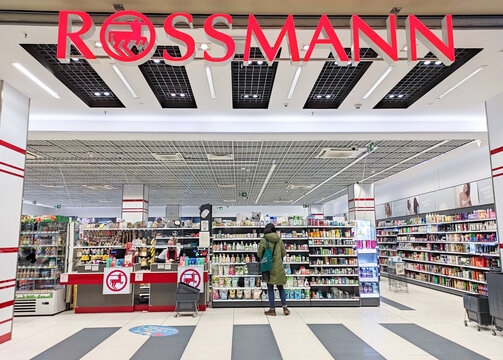

In [119]:
df_sales = pd.read_csv(path + "rossman_store_sales.csv")

<ipython-input-119-92d259c65d3e>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(path + "rossman_store_sales.csv")


In [120]:
df_sales.shape

(1017209, 9)

In [121]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Preparando Dados

In [122]:
df_sales["Date"] = pd.to_datetime(df_sales["Date"])

In [123]:
df_sales["Store"].nunique()

1115

In [124]:
# Agrupando dados por data para construir série temporal.
# Case: previsão de vendas diária considerando todas as lojas
df = df_sales.groupby("Date")["Sales"].sum()

<Axes: xlabel='Date'>

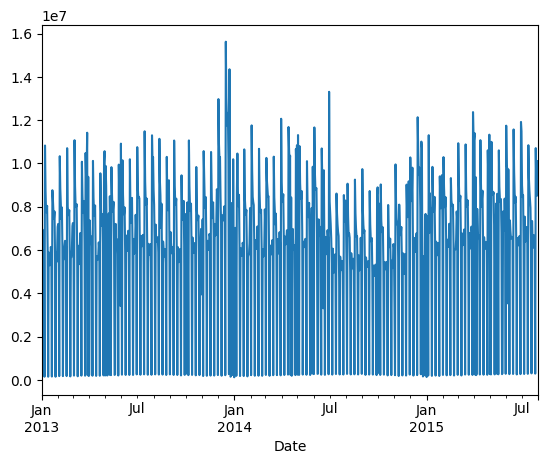

In [125]:
df.plot()

## Separação de dados para Séries Temporais

In [126]:
train = df.loc[:"2014-12-31"]
test = df.loc["2015-01-01":]

In [127]:
print(f"Train: {train.index.min()} - {train.index.max()}")

Train: 2013-01-01 00:00:00 - 2014-12-31 00:00:00


In [128]:
print(f"Test: {test.index.min()} - {test.index.max()}")

Test: 2015-01-01 00:00:00 - 2015-07-31 00:00:00


In [129]:
from sklearn.model_selection import TimeSeriesSplit

In [130]:
tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(df):
  train_fold = df.iloc[train_index]
  test_fold = df.iloc[test_index]

  print("Train Size", train_fold.shape)
  print(f"Train: {train_fold.index.min()} - {train_fold.index.max()}")
  print(f"Test: {test_fold.index.min()} - {test_fold.index.max()}")
  print("##### \n")

Train Size (237,)
Train: 2013-01-01 00:00:00 - 2013-08-25 00:00:00
Test: 2013-08-26 00:00:00 - 2014-04-17 00:00:00
##### 

Train Size (472,)
Train: 2013-01-01 00:00:00 - 2014-04-17 00:00:00
Test: 2014-04-18 00:00:00 - 2014-12-08 00:00:00
##### 

Train Size (707,)
Train: 2013-01-01 00:00:00 - 2014-12-08 00:00:00
Test: 2014-12-09 00:00:00 - 2015-07-31 00:00:00
##### 



In [131]:
tscv = TimeSeriesSplit(n_splits=3, max_train_size=237)

for train_index, test_index in tscv.split(df):
  train_fold = df.iloc[train_index]
  test_fold = df.iloc[test_index]

  print(f"Train: {train_fold.index.min()} - {train_fold.index.max()}")
  print(f"Test: {test_fold.index.min()} - {test_fold.index.max()}")
  print("##### \n")

Train: 2013-01-01 00:00:00 - 2013-08-25 00:00:00
Test: 2013-08-26 00:00:00 - 2014-04-17 00:00:00
##### 

Train: 2013-08-24 00:00:00 - 2014-04-17 00:00:00
Test: 2014-04-18 00:00:00 - 2014-12-08 00:00:00
##### 

Train: 2014-04-16 00:00:00 - 2014-12-08 00:00:00
Test: 2014-12-09 00:00:00 - 2015-07-31 00:00:00
##### 



## Analisando a série e criando features para o modelo de Machine Learning

<Axes: xlabel='Date'>

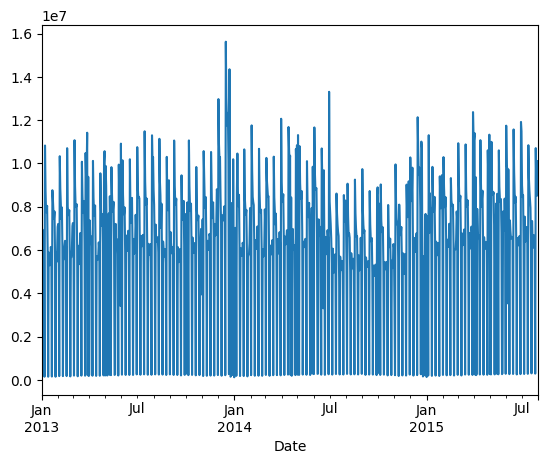

In [132]:
df.plot()

<Axes: xlabel='Date'>

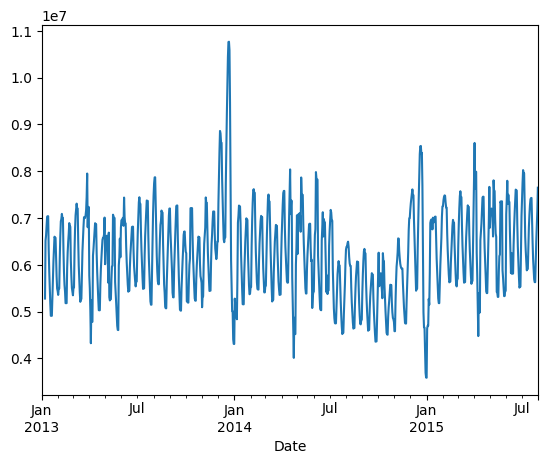

In [133]:
df.rolling(7).mean().plot()

In [134]:
df = df.to_frame()
df.head()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593


In [135]:
for lag in [1,2,3,4,5,6,7]:
  df[f"lag_{lag}"] = df["Sales"].shift(lag)

In [136]:
df.head()

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN


In [137]:
for window in [7, 15, 30]:
  df[f"moving_avg_{window}"] = df["Sales"].shift(1).rolling(window).mean()

## Separando dados para utilizar no modelo

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
train, test = train_test_split(df, test_size=0.3, shuffle=False)

In [140]:
train

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,moving_avg_7,moving_avg_15,moving_avg_30
Date,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2014-10-17,5449686,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,7047404.0,4.775370e+06,5.239416e+06,5.296749e+06
2014-10-18,4945733,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,4.547125e+06,5.059009e+06,5.261281e+06
2014-10-19,204991,4945733.0,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,4.512202e+06,5.368192e+06,5.212889e+06


In [141]:
test

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,moving_avg_7,moving_avg_15,moving_avg_30
Date,,,,,,,,,,,
2014-10-22,6129832,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5179446.0,5110401.0,5.092352e+06,5.320238e+06,5.321312e+06
2014-10-23,6463607,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5179446.0,5.237985e+06,5.240041e+06,5.349719e+06
2014-10-24,6523289,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5.421436e+06,5.212963e+06,5.399268e+06
2014-10-25,4894704,6523289.0,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5.574808e+06,5.193396e+06,5.456511e+06
2014-10-26,219359,4894704.0,6523289.0,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,5.567518e+06,5.049882e+06,5.454015e+06
...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0,5.628874e+06,6.112505e+06,6.509776e+06
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,6.110012e+06,6.807855e+06,6.648742e+06
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6.504097e+06,6.692775e+06,6.943822e+06


In [142]:
train = train.dropna()

In [143]:
train.shape

(629, 11)

In [144]:
X_train = train.drop("Sales", axis=1)
X_test = test.drop("Sales", axis=1)

y_train = train["Sales"]
y_test = test["Sales"]

In [145]:
y_test.mean()

6422312.349823321

## Treinando modelo de ML para prever vendas no dia seguinte

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
y_pred = model.predict(X_test)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [150]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MAE", mae)
print("MAPE", mape)

MAE 926173.7687279152
MAPE 1.1567805297064324


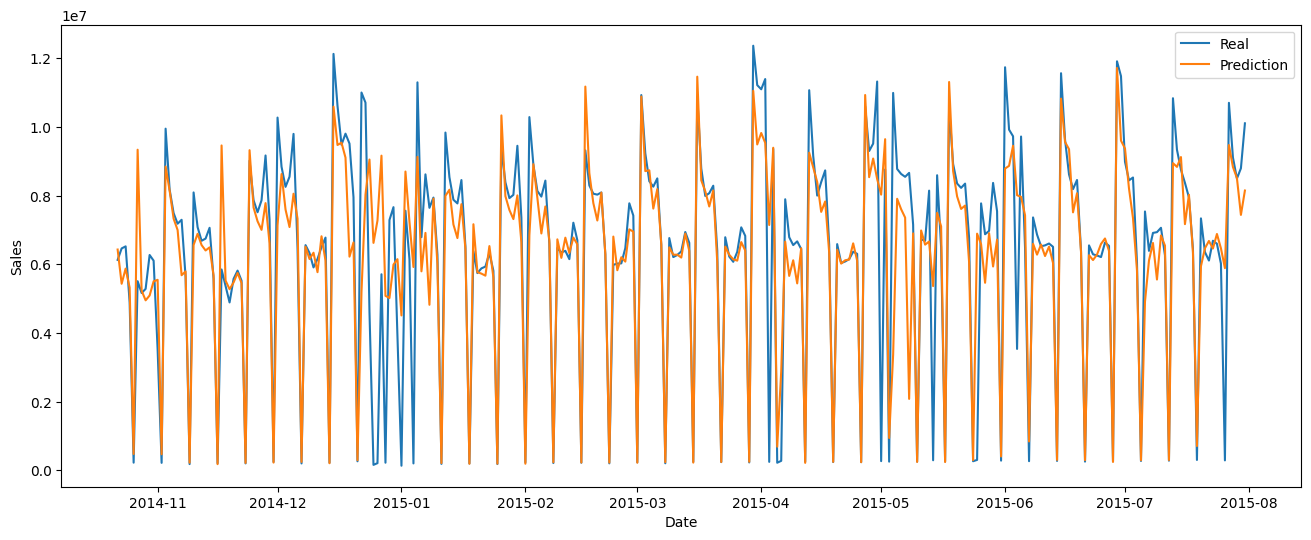

In [151]:
plt.figure(figsize=(16,6))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred, label="Prediction")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Criando novas features para melhorar as previsões

In [152]:
df_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [153]:
df_open_features = df_sales.groupby("Date")["Open"].sum()

In [154]:
df_promo_features = df_sales.groupby("Date")["Promo"].sum()

In [155]:
df = pd.concat([df, df_open_features, df_promo_features], axis=1)

In [156]:
df["DayOfWeek"] = df.index.dayofweek

In [157]:
df

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,moving_avg_7,moving_avg_15,moving_avg_30,Open,Promo,DayOfWeek
Date,,,,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,1
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,0,2
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109,0,3
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108,0,4
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,1107,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0,5.628874e+06,6.112505e+06,6.509776e+06,1113,1115,0
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,6.110012e+06,6.807855e+06,6.648742e+06,1113,1115,1
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6.504097e+06,6.692775e+06,6.943822e+06,1113,1115,2


In [158]:
train, test = train_test_split(df, test_size=0.3, shuffle=False)

X_train = train.drop("Sales", axis=1)
X_test = test.drop("Sales", axis=1)

y_train = train["Sales"]
y_test = test["Sales"]

In [159]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [160]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))

MAE 480839.6195759716
MAPE 0.07465273259238767


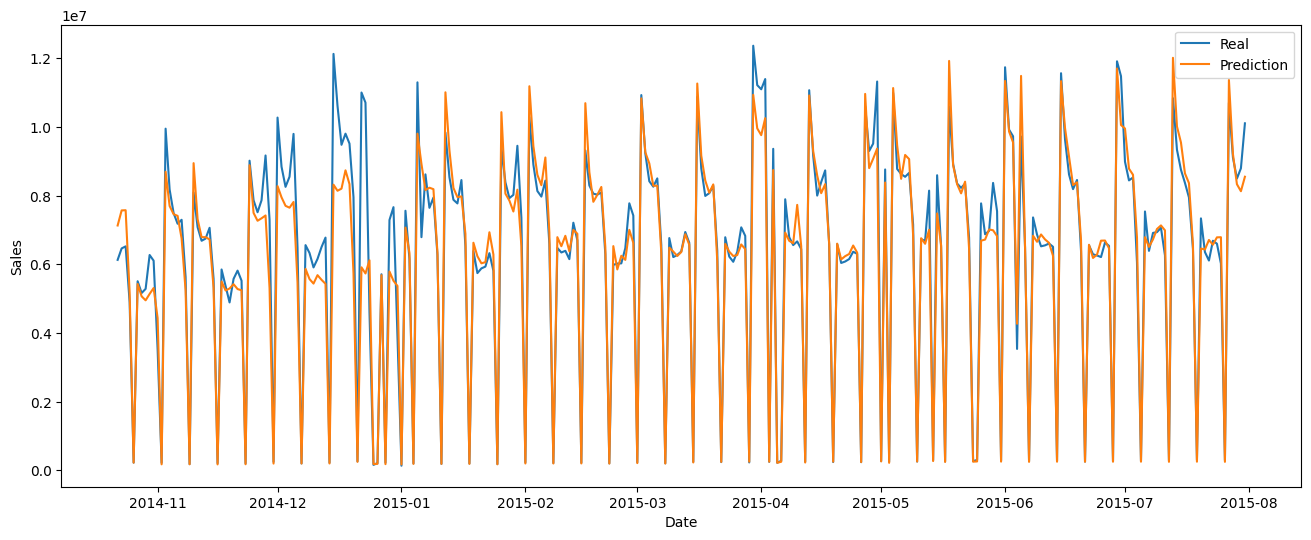

In [161]:
plt.figure(figsize=(16,6))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred, label="Prediction")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()